<a href="https://colab.research.google.com/github/Coder5050max/coding/blob/main/Dog_VS_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 45.9MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators Used for training the data in batches rather than training whole dataset whose computation would be difficult and inefficient
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#  normalize to bring pixel in range of 0 and 1 for better results

import tensorflow as tf

def normalize_image(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

train_ds = train_ds.map(normalize_image)
test_ds = test_ds.map(normalize_image)

In [7]:


# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [9]:

 model.fit(train_ds, epochs=10, validation_data=test_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.5726 - loss: 2.3837 - val_accuracy: 0.6078 - val_loss: 0.6611
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 89ms/step - accuracy: 0.6760 - loss: 0.6034 - val_accuracy: 0.7208 - val_loss: 0.5382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 81ms/step - accuracy: 0.7420 - loss: 0.5215 - val_accuracy: 0.7196 - val_loss: 0.5402
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7654 - loss: 0.4809 - val_accuracy: 0.7494 - val_loss: 0.4812
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 87ms/step - accuracy: 0.8168 - loss: 0.4113 - val_accuracy: 0.7872 - val_loss: 0.4439
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8470 - loss: 0.3469 - val_accuracy: 0.7956 - val_loss: 0.4192
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8840 - loss: 0.2727 - val_accuracy: 0.7500 - val_loss: 0.6140
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9192 - loss: 0.2025 - 

In [13]:
import cv2
import matplotlib.pyplot as plt

In [19]:
test_img = cv2.imread('Dog.jpg')

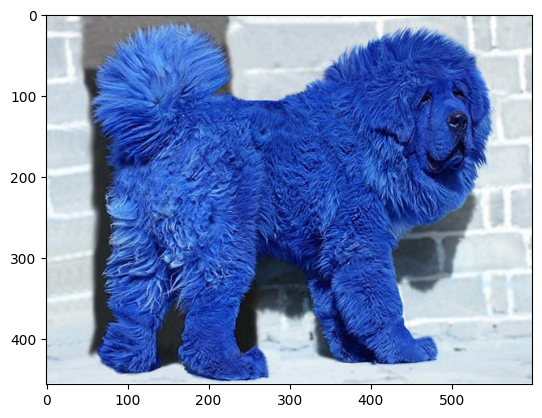

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(456, 600, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

In [27]:


predictions = model.predict(test_input)


if predictions[0][0] > 0.5:
    predicted_class = "Dog"
else:
      predicted_class = "Cat"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [29]:
predicted_class

'Dog'